In [1]:
# Homework 4
# Author: Zydney Wong
# Last modified: 30 September 2016

In [4]:
# Question 1: 
# Figure out what's wrong with our least squares solution!

# Reviewing the code for the three regression lines: 
# 1: abline(lm(out[,2]~out[,1]), col="red") # regression line (y~x) 
# 2: abline(a=0, b=beta, col="blue"), beta = beta = invXTX %*% XTy
# 3: abline(a=0, b=beta2, col="green"), beta2 = solve(XTX, XTy)

# We see that the 1st regression line is the automated function in R that 
# allows for a constant beta_0 in the regression model, i.e. Y = beta_0 + beta_1(X)
# We see that the 2nd and 3rd regression lines are input in such a way that 
# the model excludes a value of beta_0 (i.e. beta_0 = 0) such that the regression 
# line runs through the origin. This evidently limits the number of best-fit 
# regression lines possible and generates a different best-fit line that has 
# no reason to be the best-fit line, given that the there is no reason for the 
# level of dependent variable to be set at 0 when the independent variable is zero.


-0.3982103
0.7468359


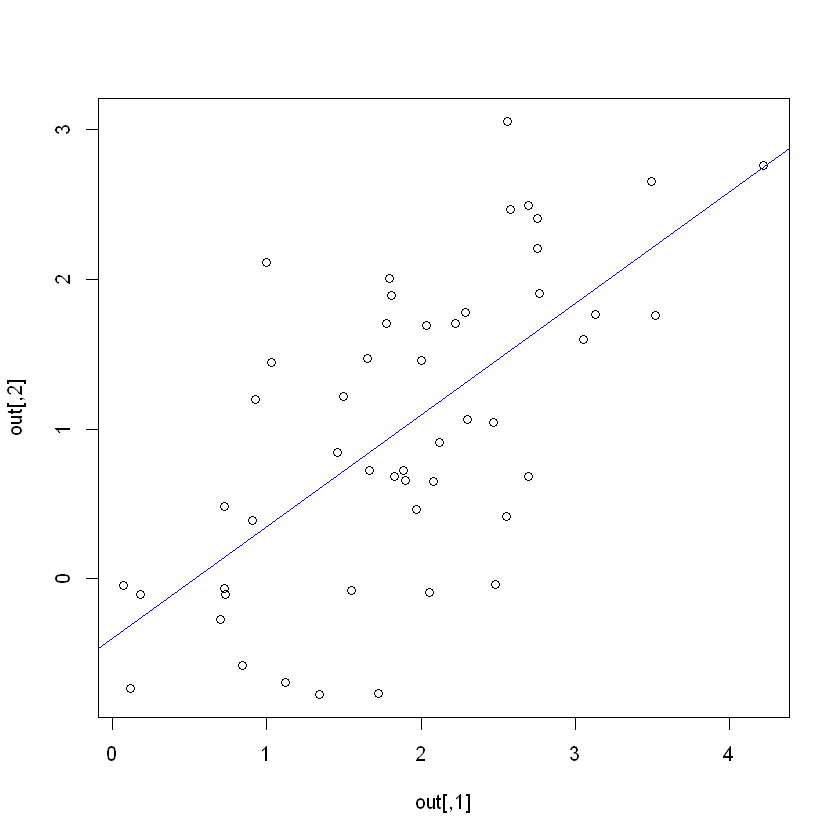

In [22]:
# Question 2: 
# Rewrite the above code to give the correct answer.

require(MASS)

# Set the correlation parameter and mean
beta = 0.5
SIGMA = matrix(c(1,beta,beta,1), ncol=2)
MU = c(2.0, 1.0)

# Set the sample size
N = 50

# Draw your sample
out <- mvrnorm(N, mu = MU, Sigma = SIGMA)

# Our data set is named `out`, which we split into y and X
y <- out[, 2]
X <- cbind(rep(1,N),out[, 1])

# The modification creates a column of one's and binds it to the 
# original out[,1] vector. This creates a two-dimensional vector whose elements 
# are determined as beta_0 and beta_1


# Now carry out intermediate calculations
XT = t(X)
XTX = XT%*%X
invXTX = solve(XTX)
XTy = XT%*%y
beta = invXTX %*% XTy
beta

# Now add this line to the plot
plot(out)
abline(lm(out[,2]~out[,1]), col="red") # regression line (y~x) 
abline(a=beta[1], b=beta[2], col="blue")
# We must then adjust the manual configuration of the line 
# to allow for the value of beta_0 as the intercept.



In [46]:
# Question 3: Rewrite the above code to estimate the vector 
# $\beta$ for a $3$ dimensional normal random variable.

require(MASS)

# Set the correlation parameter and mean
# A 3-dimensional normal RV has a 1 x 3 mean matrix MU_3D and a 3 x 3 
# variance-covariance matrix SIGMA_3D with the variances on the diagonal and 
# the covariances off the diagonal. We choose the values arbitrarily

SIGMA_3D = matrix(c(1, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 1), ncol=3)
MU_3D = c(2.0, 5.0, 9.0)

# Set the sample size
N = 400
# We set an arbitrarily large n > 30 such that all the necessary WLLN and CLT 
# theorems apply for asymptotics of the regression

# Draw your sample
out_3D <- mvrnorm(N, mu = MU_3D, Sigma = SIGMA_3D)

# We define the regression model, where we estimate the vector of beta_coefficients:
# Y = beta_0 + beta_1.x_1 + beta_2.x_2 + error term
# Our data set is named `out_3D`, which we split into y and X
y <- out_3D[, 2]
X <- cbind(rep(1,N),out_3D[, c(2,3)])

# We carry out the imtermediate calculations
XT = t(X)
XTX = XT%*%X
invXTX = solve(XTX)
XTy = XT%*%y
beta = invXTX %*% XTy
beta


# Not sure how to plot... 

-1.136868e-13
1
7.105427e-15
